# **Prática de Análise Preditiva - Base Titanic**

Vamos fazer uma Análise Preditiva completa com a base Titanic. Essa análise Preditiva vai conter esses passos:


1.   Leitura dos dados
2.   Verificação e tratamento de valores ausentes e outliers
3.   Análise Exploratória
4.   Separação da base para treinamento
5.   Engenharia de Features
5.   Modelagem
6.   Avaliação do Modelo



**Descrição da base de estudo**:

# Atributos da Base de Dados do Titanic

| Atributo         | Tipo       | Descrição                                                       |
| ---------------- | ---------- | --------------------------------------------------------------- |
| `PassengerId`    | Inteiro    | Identificador único para cada passageiro.                       |
| `Survived`       | Inteiro    | Indicador de sobrevivência (0 = Não, 1 = Sim).                  |
| `Pclass`         | Inteiro    | Classe do bilhete (1 = Primeira, 2 = Segunda, 3 = Terceira).    |
| `Name`           | Texto      | Nome do passageiro.                                             |
| `Sex`            | Texto      | Gênero do passageiro (male = Masculino, female = Feminino).     |
| `Age`            | Decimal    | Idade do passageiro em anos.                                    |
| `SibSp`          | Inteiro    | Número de irmãos/cônjuges a bordo do Titanic.                   |
| `Parch`          | Inteiro    | Número de pais/filhos a bordo do Titanic.                       |
| `Ticket`         | Texto      | Número do bilhete.                                              |
| `Fare`           | Decimal    | Tarifa do passageiro.                                           |
| `Cabin`          | Texto      | Número da cabine.                                               |
| `Embarked`       | Texto      | Porto de embarque (C = Cherbourg, Q = Queenstown, S = Southampton). |

## Exemplo de Registro

| PassengerId | Survived | Pclass | Name                       | Sex   | Age | SibSp | Parch | Ticket   | Fare   | Cabin | Embarked |
|-------------|----------|--------|----------------------------|-------|-----|-------|-------|----------|--------|-------|----------|
| 1           | 0        | 3      | Braund, Mr. Owen Harris    | male  | 22  | 1     | 0     | A/5 21171| 7.25   |       | S        |
| 2           | 1        | 1      | Cumings, Mrs. John Bradley | female| 38  | 1     | 0     | PC 17599 | 71.2833| C85   | C        |



## Leitura dos dados

In [1]:
import pandas as pd

df = pd.read_csv('titanic.csv')

In [2]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.shape

(891, 12)

## Verificação e tratamento de valores ausentes e outliers

In [4]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


### Removendo Linhas Nulas da Coluna Embarked

In [5]:
df_sem_embarked = df.dropna(subset=['Embarked'])

In [6]:
df_sem_embarked.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


### Removendo coluna Cabin

In [7]:
df_sem_cabin = df_sem_embarked.drop(columns=['Cabin'])

In [8]:
df_sem_cabin.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


### Preenchendo a média para a idade

In [9]:
df_media_idade = df_sem_cabin.fillna(df_sem_cabin['Age'].mean())

In [10]:
df_media_idade.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


### Verificando presença de outliers

In [11]:
df_media_idade.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,29.642093,0.524184,0.382452,32.096681
std,256.998173,0.486260,0.834700,12.968346,1.103705,0.806761,49.697504
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,29.642093,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


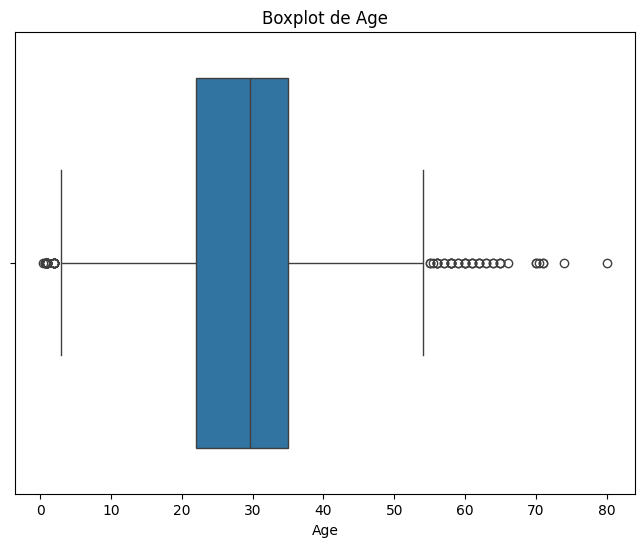

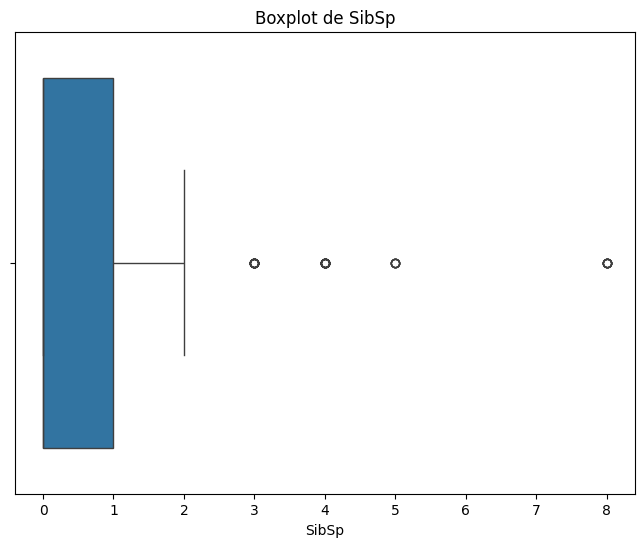

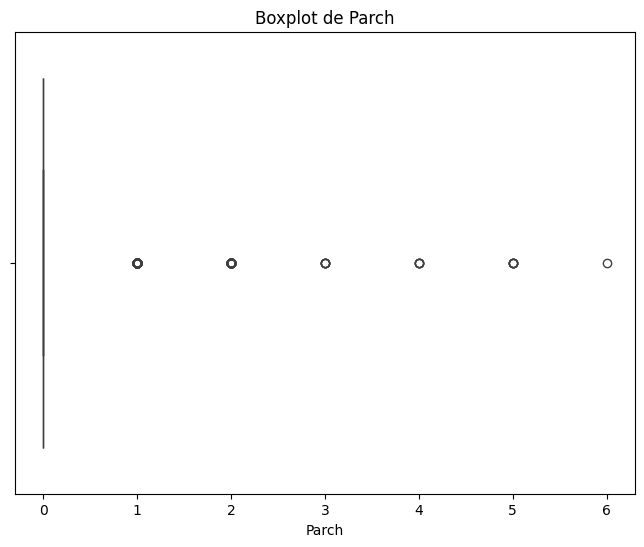

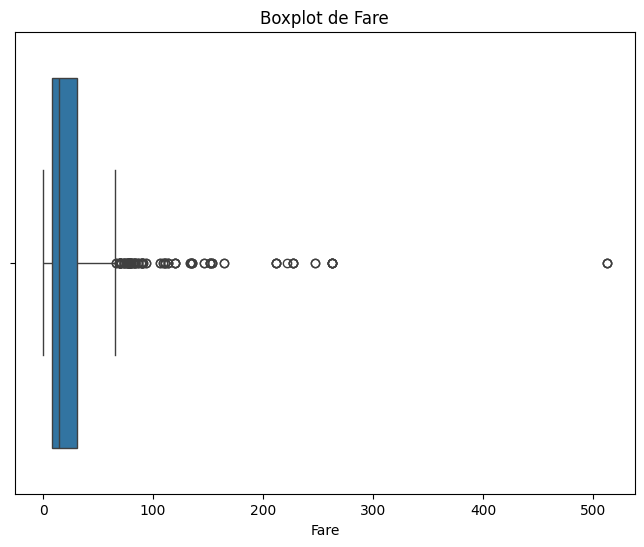

In [12]:
# prompt: gerar boxplots para identificar outliers para as variáveis numéricas de df_media_idade

import matplotlib.pyplot as plt
import seaborn as sns

# Criando boxplots para as variáveis numéricas
numerical_cols = ['Age', 'SibSp', 'Parch', 'Fare']
for col in numerical_cols:
  plt.figure(figsize=(8, 6))
  sns.boxplot(x=df_media_idade[col])
  plt.title(f'Boxplot de {col}')
  plt.show()


### Substituindo outliers pelos valores limites

In [13]:
df_sem_outliers = df_media_idade.copy()

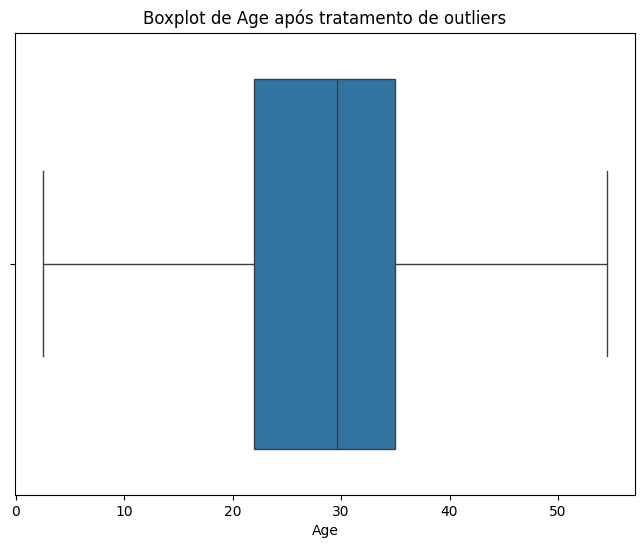

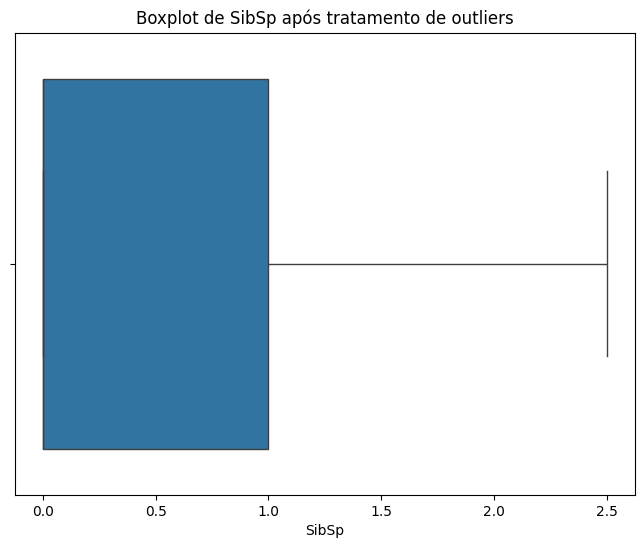

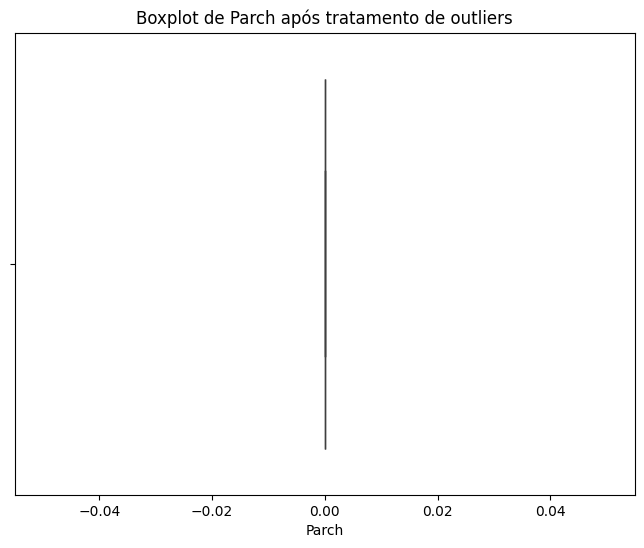

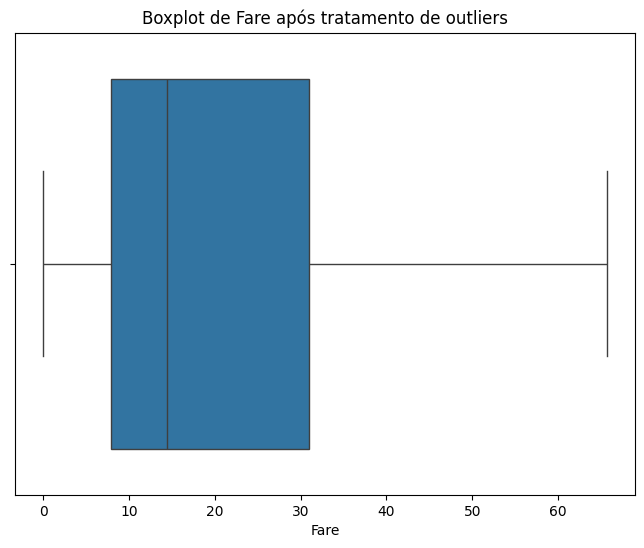

In [14]:
# prompt: poderia código para substituir outliers pelos valores limites

import matplotlib.pyplot as plt
def replace_outliers_with_limits(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower=lower_limit, upper=upper_limit)
    return df

# Aplicando a função para cada coluna numérica
for col in numerical_cols:
    df_sem_outliers = replace_outliers_with_limits(df_media_idade, col)

# Verificando se os outliers foram substituídos (gerando novos boxplots)
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df_media_idade[col])
    plt.title(f'Boxplot de {col} após tratamento de outliers')
    plt.show()


In [15]:
df_sem_outliers.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.0,889.000000
mean,446.000000,0.382452,2.311586,29.327503,0.427447,0.0,23.956061
std,256.998173,0.486260,0.834700,12.042290,0.708753,0.0,20.414997
min,1.000000,0.000000,1.000000,2.500000,0.000000,0.0,0.000000
25%,224.000000,0.000000,2.000000,22.000000,0.000000,0.0,7.895800
50%,446.000000,0.000000,3.000000,29.642093,0.000000,0.0,14.454200
75%,668.000000,1.000000,3.000000,35.000000,1.000000,0.0,31.000000
max,891.000000,1.000000,3.000000,54.500000,2.500000,0.0,65.656300


## Análise Exploratória

### Histograma das variáveis numéricas

In [16]:
df_sem_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    float64
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(3), int64(4), object(4)
memory usage: 83.3+ KB


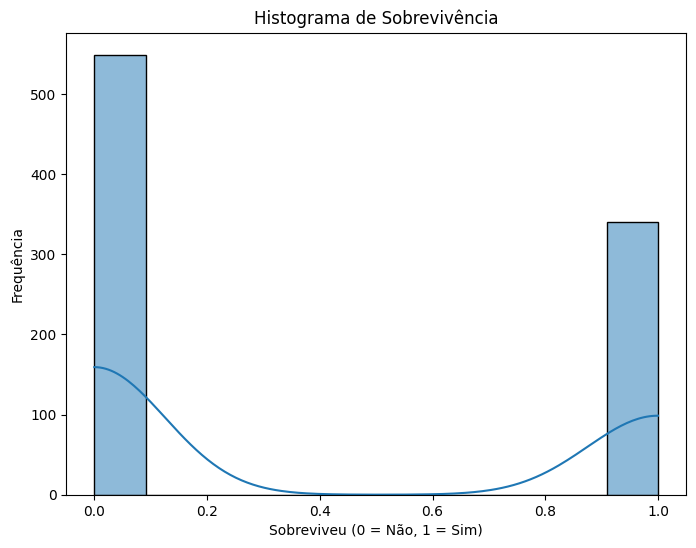

In [17]:
# prompt: histograma de survided

import matplotlib.pyplot as plt
# Histograma da variável 'Survived'
plt.figure(figsize=(8, 6))
sns.histplot(df_sem_outliers['Survived'], kde=True)  # kde=True adiciona a curva de densidade
plt.title('Histograma de Sobrevivência')
plt.xlabel('Sobreviveu (0 = Não, 1 = Sim)')
plt.ylabel('Frequência')
plt.show()


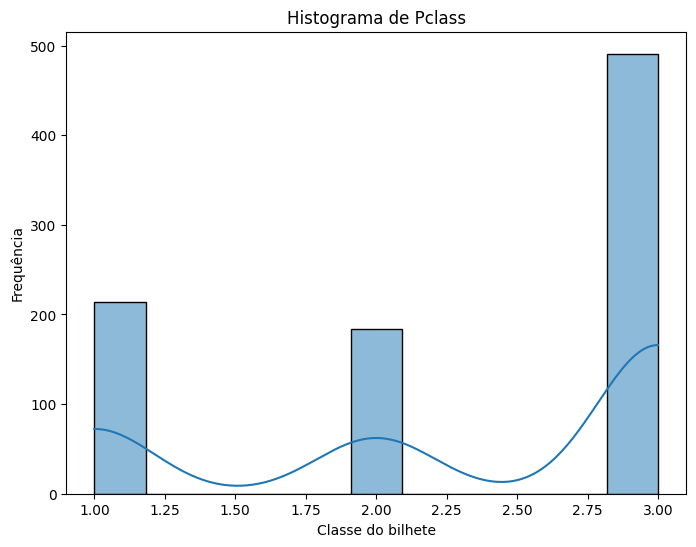

In [18]:
# prompt: histograma para pClass

import matplotlib.pyplot as plt
# Histograma da variável 'Pclass'
plt.figure(figsize=(8, 6))
sns.histplot(df_sem_outliers['Pclass'], kde=True)  # kde=True adiciona a curva de densidade
plt.title('Histograma de Pclass')
plt.xlabel('Classe do bilhete')
plt.ylabel('Frequência')
plt.show()


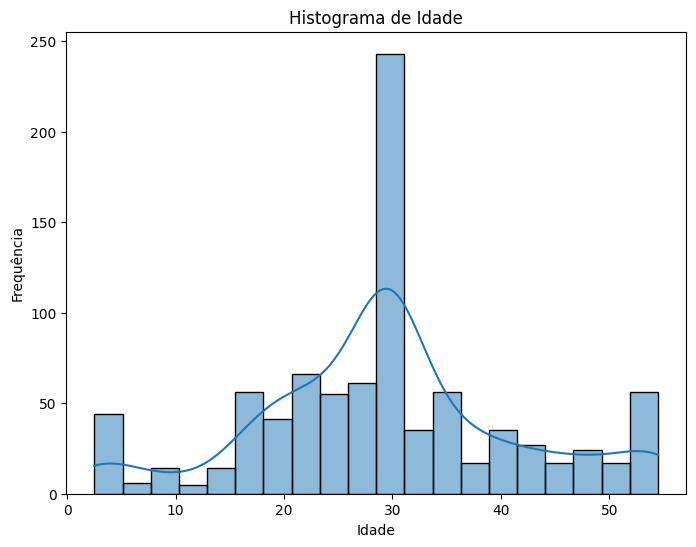

In [19]:
# prompt: histograma para Age

import matplotlib.pyplot as plt
# Histograma da variável 'Age'
plt.figure(figsize=(8, 6))
sns.histplot(df_sem_outliers['Age'], kde=True)  # kde=True adiciona a curva de densidade
plt.title('Histograma de Idade')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()


### Gráficos de dispersão (Scatter Plot)

In [20]:
df_sem_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    float64
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(3), int64(4), object(4)
memory usage: 83.3+ KB


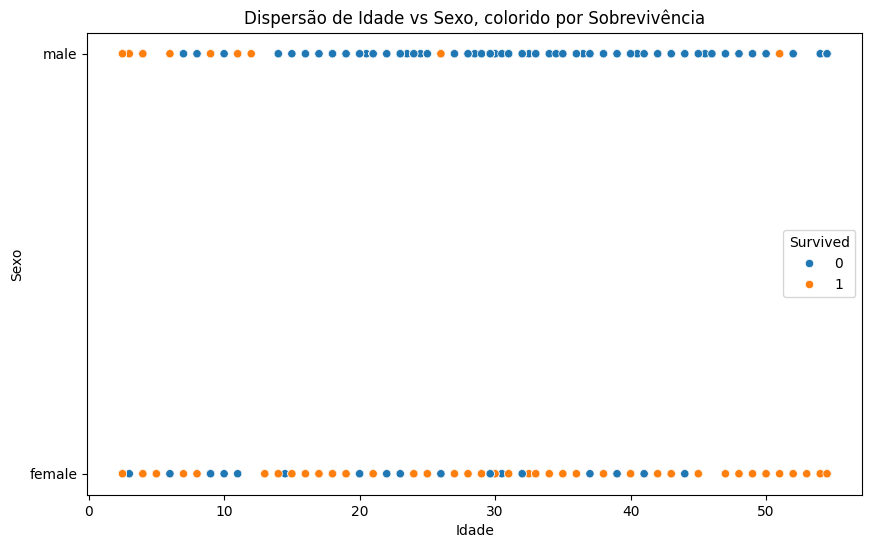

In [21]:
# prompt: crie um gráfico de dispersão para Age versus Sex colorindo pela coluna Survived

import matplotlib.pyplot as plt
# Gráfico de dispersão Age vs Sex, colorido por Survived
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Sex', hue='Survived', data=df_sem_outliers)
plt.title('Dispersão de Idade vs Sexo, colorido por Sobrevivência')
plt.xlabel('Idade')
plt.ylabel('Sexo')
plt.show()


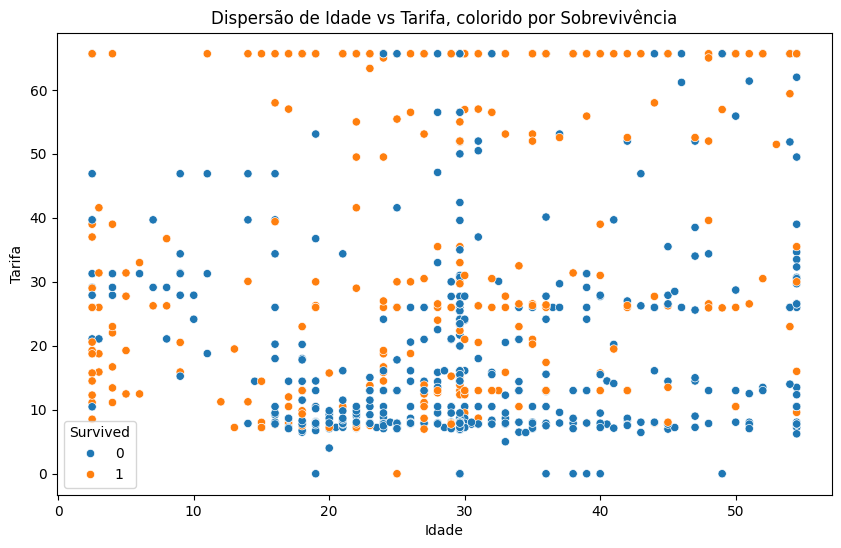

In [22]:
# prompt: crie um gráfico de dispersão para Age versus Fare colorindo pela coluna Survived

import matplotlib.pyplot as plt
# Gráfico de dispersão Age vs Fare, colorido por Survived
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=df_sem_outliers)
plt.title('Dispersão de Idade vs Tarifa, colorido por Sobrevivência')
plt.xlabel('Idade')
plt.ylabel('Tarifa')
plt.show()


### Pairplot

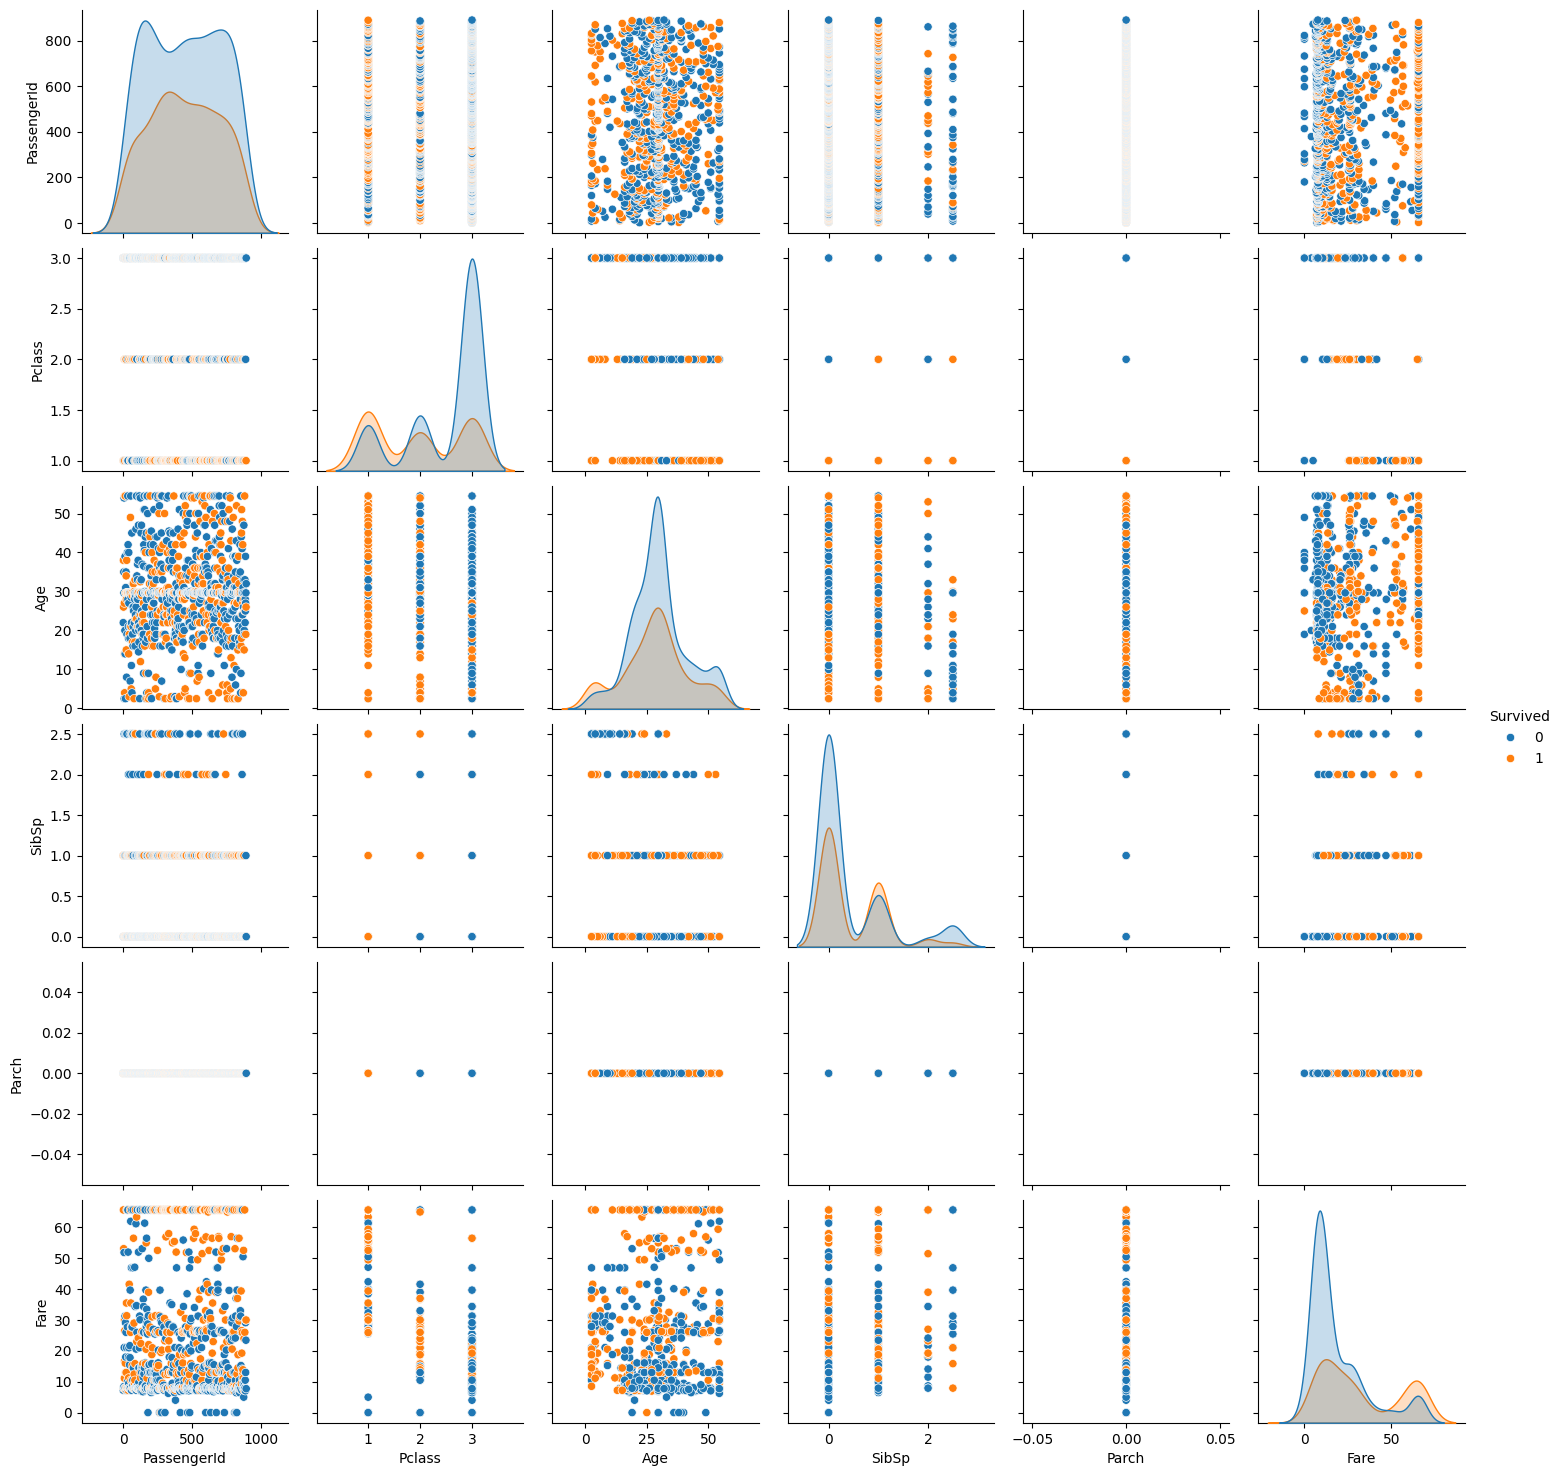

In [23]:
# prompt: crie um pairplot para o dataframe df_sem_outliers usando a coluna survived para pintar

import matplotlib.pyplot as plt
sns.pairplot(df_sem_outliers, hue='Survived')
plt.show()


### Matriz de Correlação

             PassengerId  Survived    Pclass       Age     SibSp  Parch  \
PassengerId     1.000000 -0.005028 -0.035330  0.033453 -0.072990    NaN   
Survived       -0.005028  1.000000 -0.335549 -0.069995  0.033225    NaN   
Pclass         -0.035330 -0.335549  1.000000 -0.328163  0.021124    NaN   
Age             0.033453 -0.069995 -0.328163  1.000000 -0.250359    NaN   
SibSp          -0.072990  0.033225  0.021124 -0.250359  1.000000    NaN   
Parch                NaN       NaN       NaN       NaN       NaN    NaN   
Fare            0.003266  0.313658 -0.713413  0.132320  0.354126    NaN   

                 Fare  
PassengerId  0.003266  
Survived     0.313658  
Pclass      -0.713413  
Age          0.132320  
SibSp        0.354126  
Parch             NaN  
Fare         1.000000  


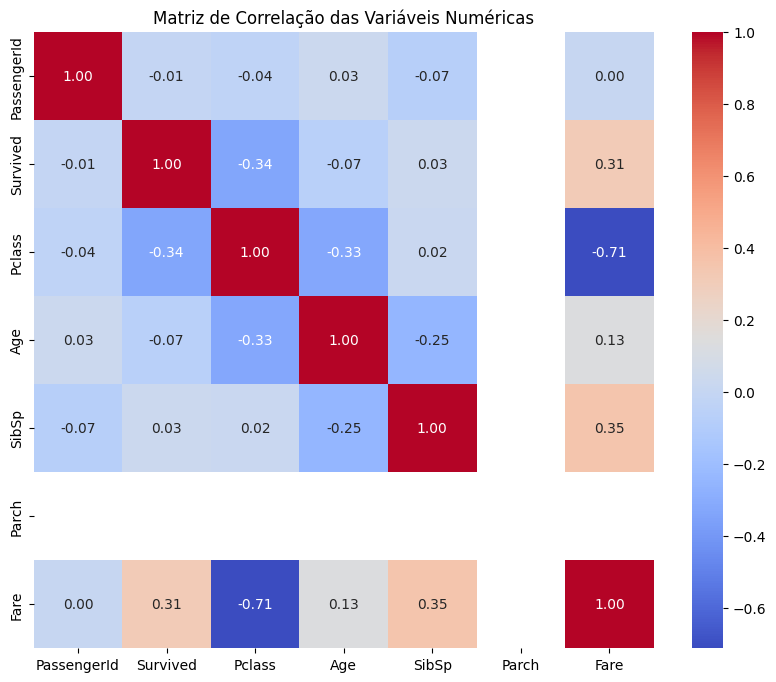

In [24]:
# prompt: gere uma matriz de correlação somente com as variáveis numéricas da base

import matplotlib.pyplot as plt
# Selecionando apenas as colunas numéricas
numerical_df = df_sem_outliers.select_dtypes(include=['number'])

# Calculando a matriz de correlação
correlation_matrix = numerical_df.corr()

# Exibindo a matriz de correlação
print(correlation_matrix)

# Plotando a matriz de correlação (opcional)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação das Variáveis Numéricas')
plt.show()


In [25]:
df_sem_outliers['Parch'].value_counts()

,count
Parch,
0,889


## Separação da base para treinamento

In [26]:
from sklearn.model_selection import train_test_split

X = df_sem_outliers.drop(columns=['Survived'])
y = df_sem_outliers['Survived']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
X_train.shape

(711, 10)

In [29]:
X_test.shape

(178, 10)

## Engenharia de Features

### Normalizando variáveis

In [30]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [31]:
X_train_mm = X_train.copy()
X_test_mm = X_test.copy()

In [32]:
min_max_scaler = MinMaxScaler()
X_train_mm[['Age', 'SibSp', 'Parch', 'Fare']] = min_max_scaler.fit_transform(X_train_mm[['Age', 'SibSp', 'Parch', 'Fare']])

In [33]:
X_test_mm[['Age', 'SibSp', 'Parch', 'Fare']] = min_max_scaler.transform(X_test_mm[['Age', 'SibSp', 'Parch', 'Fare']])

In [34]:
X_train_mm.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,711.000000,711.000000,711.000000,711.000000,711.0,711.000000
mean,446.922644,2.322082,0.519931,0.176934,0.0,0.364454
std,256.635124,0.835180,0.234382,0.290754,0.0,0.310445
min,1.000000,1.000000,0.000000,0.000000,0.0,0.000000
25%,225.500000,2.000000,0.375000,0.000000,0.0,0.120260
50%,451.000000,3.000000,0.521963,0.000000,0.0,0.220847
75%,672.500000,3.000000,0.644231,0.400000,0.0,0.467523
max,891.000000,3.000000,1.000000,1.000000,0.0,1.000000


In [35]:
X_test_mm.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,178.000000,178.000000,178.000000,178.000000,178.0,178.000000
mean,442.314607,2.269663,0.499866,0.147191,0.0,0.366533
std,259.137295,0.833806,0.219947,0.251814,0.0,0.313772
min,6.000000,1.000000,0.000000,0.000000,0.0,0.000000
25%,217.750000,2.000000,0.375000,0.000000,0.0,0.121180
50%,435.000000,3.000000,0.521963,0.000000,0.0,0.198001
75%,656.000000,3.000000,0.605769,0.400000,0.0,0.472156
max,887.000000,3.000000,1.000000,1.000000,0.0,1.000000


### Codificar as variáveis categóricas

In [36]:
from sklearn.preprocessing import OneHotEncoder

In [37]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 711 entries, 708 to 103
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  711 non-null    int64  
 1   Pclass       711 non-null    int64  
 2   Name         711 non-null    object 
 3   Sex          711 non-null    object 
 4   Age          711 non-null    float64
 5   SibSp        711 non-null    float64
 6   Parch        711 non-null    int64  
 7   Ticket       711 non-null    object 
 8   Fare         711 non-null    float64
 9   Embarked     711 non-null    object 
dtypes: float64(3), int64(3), object(4)
memory usage: 61.1+ KB


In [38]:
colunas_categoricas = ['Pclass', 'Sex', 'Embarked']

In [39]:
one_hot_encoder = OneHotEncoder(sparse_output=False)
one_hot_encoder = one_hot_encoder.fit(X_train_mm[colunas_categoricas])

X_train_ohe = one_hot_encoder.transform(X_train_mm[colunas_categoricas])
X_test_ohe = one_hot_encoder.transform(X_test_mm[colunas_categoricas])

X_train_ohe = pd.DataFrame(X_train_ohe, columns=one_hot_encoder.get_feature_names_out(colunas_categoricas))
X_test_ohe = pd.DataFrame(X_test_ohe, columns=one_hot_encoder.get_feature_names_out(colunas_categoricas))

In [40]:
X_train_ohe

,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
706,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
707,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
708,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
709,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0


In [41]:
X_train_mm.reset_index(drop=True, inplace=True)
X_test_mm.reset_index(drop=True, inplace=True)

In [42]:
X_train_mm_ohe = pd.concat([X_train_mm.drop(columns=colunas_categoricas), X_train_ohe], axis=1)
X_test_mm_ohe = pd.concat([X_test_mm.drop(columns=colunas_categoricas), X_test_ohe], axis=1)

In [43]:
X_train_mm_ohe

,PassengerId,Name,Age,SibSp,Parch,Ticket,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,709,"Cleaver, Miss. Alice",0.375000,0.0,0.0,113781,1.000000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,241,"Zabour, Miss. Thamine",0.521963,0.4,0.0,2665,0.220149,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
2,383,"Tikkanen, Mr. Juho",0.567308,0.0,0.0,STON/O 2. 3101293,0.120704,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3,793,"Sage, Miss. Stella Anna",0.521963,1.0,0.0,CA. 2343,1.000000,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
4,684,"Goodwin, Mr. Charles Edward",0.221154,1.0,0.0,CA 2144,0.714326,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
706,108,"Moss, Mr. Albert Johan",0.521963,0.0,0.0,312991,0.118420,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
707,272,"Tornquist, Mr. William Henry",0.432692,0.0,0.0,LINE,0.000000,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
708,863,"Swift, Mrs. Frederick Joel (Margaret Welles Ba...",0.875000,0.0,0.0,17466,0.394923,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
709,437,"Ford, Miss. Doolina Margaret ""Daisy""",0.355769,0.8,0.0,W./C. 6608,0.523560,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0


### Seleção de Atributos

In [44]:
X_train_mm_ohe.drop(columns=['PassengerId', 'Name', 'Ticket', 'Parch'], inplace=True)
X_test_mm_ohe.drop(columns=['PassengerId', 'Name', 'Ticket', 'Parch'], inplace=True)

In [45]:
X_train_mm_ohe

,Age,SibSp,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0.375000,0.0,1.000000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.521963,0.4,0.220149,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
2,0.567308,0.0,0.120704,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3,0.521963,1.0,1.000000,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
4,0.221154,1.0,0.714326,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
706,0.521963,0.0,0.118420,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
707,0.432692,0.0,0.000000,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
708,0.875000,0.0,0.394923,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
709,0.355769,0.8,0.523560,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0


## Modelagem

### Regressão Logística

In [46]:
from sklearn.linear_model import LogisticRegression

In [47]:
log_reg = LogisticRegression()

In [48]:
log_reg.fit(X_train_mm_ohe, y_train)

LogisticRegression()

In [49]:
y_train_pred = log_reg.predict(X_train_mm_ohe)
y_test_pred = log_reg.predict(X_test_mm_ohe)

In [50]:
X_train_mm_ohe_predict = X_train_mm_ohe.copy()
X_train_mm_ohe_predict['Survived_pred'] = y_train_pred

X_test_mm_ohe_predict = X_test_mm_ohe.copy()
X_test_mm_ohe_predict['Survived_pred'] = y_test_pred

In [51]:
X_train_mm_ohe_predict['Survived'] = y_train.reset_index(drop=True)

In [52]:
X_train_mm_ohe_predict

,Age,SibSp,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Survived_pred,Survived
0,0.375000,0.0,1.000000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1,1
1,0.521963,0.4,0.220149,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1,0
2,0.567308,0.0,0.120704,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0,0
3,0.521963,1.0,1.000000,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0,0
4,0.221154,1.0,0.714326,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
706,0.521963,0.0,0.118420,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0,1
707,0.432692,0.0,0.000000,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0,1
708,0.875000,0.0,0.394923,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1,1
709,0.355769,0.8,0.523560,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0,0


In [53]:
X_test_mm_ohe_predict['Survived'] = y_test.reset_index(drop=True)
X_test_mm_ohe_predict

,Age,SibSp,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Survived_pred,Survived
0,0.490385,0.0,0.119626,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0,0
1,0.221154,0.4,1.000000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1,1
2,0.221154,0.4,0.171220,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1,1
3,0.528846,0.0,0.198001,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0,0
4,0.298077,0.0,1.000000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.278846,0.0,0.108520,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0,0
174,0.298077,0.0,0.118420,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1,0
175,0.682692,0.4,0.478058,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0,1
176,0.586538,1.0,0.241409,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0,1


## Avaliação do Modelo

In [54]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [55]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84       440
           1       0.77      0.69      0.73       271

    accuracy                           0.80       711
   macro avg       0.79      0.78      0.79       711
weighted avg       0.80      0.80      0.80       711



In [56]:
# prompt: gerar a matriz de confusão para o treino em um dataframe colocando o que foi predito com o real]

import pandas as pd
# Confusion Matrix for Training Data
cm_train = confusion_matrix(y_train, y_train_pred)

# Create a DataFrame from the confusion matrix
cm_train_df = pd.DataFrame(cm_train,
                           index=['Real 0', 'Real 1'],
                           columns=['Predito 0', 'Predito 1'])

print("Confusion Matrix (Treino):")
cm_train_df


Confusion Matrix (Treino):


,Predito 0,Predito 1
Real 0,384,56
Real 1,85,186


In [57]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.84      0.83      0.83       109
           1       0.73      0.75      0.74        69

    accuracy                           0.80       178
   macro avg       0.79      0.79      0.79       178
weighted avg       0.80      0.80      0.80       178



### Decision Tree

In [58]:
from sklearn.tree import DecisionTreeClassifier

In [59]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train_mm_ohe, y_train)

DecisionTreeClassifier()

In [60]:
y_train_pred = decision_tree.predict(X_train_mm_ohe)
y_test_pred = decision_tree.predict(X_test_mm_ohe)

In [61]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [62]:
# prompt: gerar a matriz de confusão para o treino em um dataframe colocando o que foi predito com o real]

import pandas as pd
# Confusion Matrix for Training Data
cm_train = confusion_matrix(y_train, y_train_pred)

# Create a DataFrame from the confusion matrix
cm_train_df = pd.DataFrame(cm_train,
                           index=['Real 0', 'Real 1'],
                           columns=['Predito 0', 'Predito 1'])

print("Confusion Matrix (Treino):")
cm_train_df


Confusion Matrix (Treino):


,Predito 0,Predito 1
Real 0,438,2
Real 1,12,259


In [63]:
# prompt: gerar a matriz de confusão para o treino em um dataframe colocando o que foi predito com o real]

import pandas as pd
# Confusion Matrix for Training Data
cm_train = confusion_matrix(y_test, y_test_pred)

# Create a DataFrame from the confusion matrix
cm_train_df = pd.DataFrame(cm_train,
                           index=['Real 0', 'Real 1'],
                           columns=['Predito 0', 'Predito 1'])

print("Confusion Matrix (Treino):")
cm_train_df


Confusion Matrix (Treino):


,Predito 0,Predito 1
Real 0,82,27
Real 1,16,53


In [64]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       440
           1       0.99      0.96      0.97       271

    accuracy                           0.98       711
   macro avg       0.98      0.98      0.98       711
weighted avg       0.98      0.98      0.98       711



In [65]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.84      0.75      0.79       109
           1       0.66      0.77      0.71        69

    accuracy                           0.76       178
   macro avg       0.75      0.76      0.75       178
weighted avg       0.77      0.76      0.76       178

